In [ ]:
import xarray as xr
import data_types
import importlib
import matplotlib.pyplot as plt
import numpy as np
from cartopy import crs as ccrs
import seaborn

years=range(2020,2021)

data_dir = '/scratch/cimes/feiyul/Ocean_Data'
# data_dir = '/collab1/data_untrusted/Feiyu.Lu/Ocean_Data'

model_dz_ds = xr.open_dataset(f'{data_dir}/model_data/M9/vgrid_75_2m.nc')
model_dz = model_dz_ds.dz
model_zi = np.zeros(len(model_dz)+1)
for i in range(1,len(model_dz)+1):
    model_zi[i] = model_dz[0:i].sum().values

argo_obs_ds = xr.open_mfdataset(
    [f'{data_dir}/obs_data/argo/argo_{year}.nc' for year in years])

[0.00000e+00 2.00000e+00 4.00000e+00 6.00000e+00 8.00000e+00 1.00100e+01
 1.20200e+01 1.40400e+01 1.60700e+01 1.81200e+01 2.02000e+01 2.23100e+01
 2.44600e+01 2.66600e+01 2.89300e+01 3.12700e+01 3.37100e+01 3.62600e+01
 3.89500e+01 4.18000e+01 4.48400e+01 4.81100e+01 5.16500e+01 5.55000e+01
 5.97200e+01 6.43800e+01 6.95600e+01 7.53500e+01 8.18700e+01 8.92400e+01
 9.76100e+01 1.07160e+02 1.18100e+02 1.30670e+02 1.45150e+02 1.61870e+02
 1.81200e+02 2.03560e+02 2.29430e+02 2.59340e+02 2.93870e+02 3.33660e+02
 3.79380e+02 4.31750e+02 4.91510e+02 5.59400e+02 6.36140e+02 7.22430e+02
 8.18900e+02 9.26100e+02 1.04445e+03 1.17426e+03 1.31568e+03 1.46869e+03
 1.63310e+03 1.80857e+03 1.99458e+03 2.19048e+03 2.39549e+03 2.60876e+03
 2.82936e+03 3.05635e+03 3.28878e+03 3.52574e+03 3.76637e+03 4.00989e+03
 4.25561e+03 4.50294e+03 4.75139e+03 5.00057e+03 5.25019e+03 5.50005e+03
 5.75001e+03 6.00000e+03 6.25000e+03 6.50000e+03]


In [3]:
importlib.reload(data_types)
argo_obs = data_types.argo(argo_obs_ds)
len(argo_obs)

85555

0


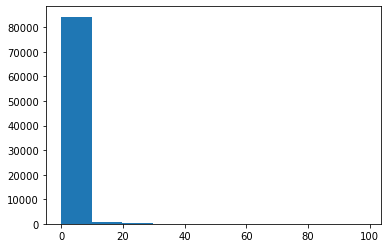

In [4]:
plt.hist(argo_obs.min_depth)
print(sum(argo_obs.min_depth>100))

(array([25753.,  2210.,  2609., 13050.,  7519.,  1456.,  1367., 31080.,
          429.,    82.]),
 array([  50. ,  176.4,  302.8,  429.2,  555.6,  682. ,  808.4,  934.8,
        1061.2, 1187.6, 1314. ]),
 <BarContainer object of 10 artists>)

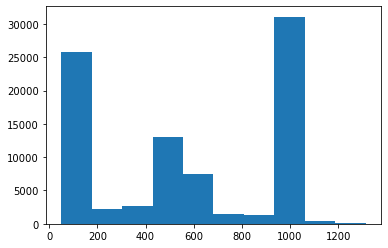

In [5]:
plt.hist(argo_obs.levels)

(array([  295., 43717.,  4091., 11981.,  2174.,  7304., 12254.,  2373.]),
 array([ 0,  1,  2,  3,  5, 10, 20, 30, 40]),
 <BarContainer object of 8 artists>)

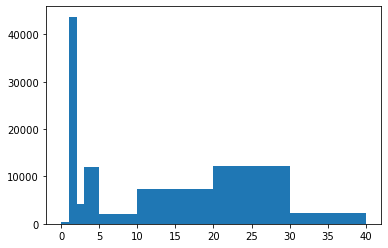

In [6]:
plt.hist((argo_obs.max_depth-argo_obs.min_depth)/argo_obs.levels,[0,1,2,3,5,10,20,30,40])

2020-06-30T15:16:52.499999744 -9.678 181.13
[9.9435574e-01 1.9887067e+00 2.9830527e+00 ... 1.9792521e+03 1.9812220e+03
 1.9828965e+03] 1008


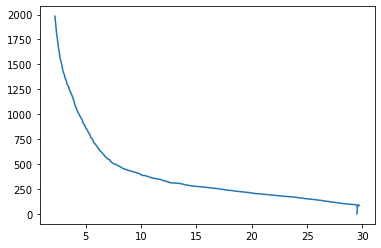

In [12]:
i=50000
print(argo_obs.time[i],argo_obs.lat[i],argo_obs.lon[i])
print(argo_obs.profiles[i].depth,argo_obs.profiles[i].levels)
plt.plot(argo_obs.profiles[i].T, argo_obs.profiles[i].depth)